In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean,stdev
import math
import sys
#import MDAnalysis as mda

!!! REMINDER OF EQUATIONS !!!

In [3]:
colors = ["#003366" ,"#ff7518" ,"#ae0c00", "#4b0082", "#BCADE0","#177245" ,"#f4c430" ,"#89cff0"]

In [4]:
residue_1_letter_codes = {
    "ALA": "A",
    "GLY": "G",
    "ILE": "I",
    "LEU": "L",
    "PRO": "P",
    "VAL": "V",
    "PHE": "F",
    "TRP": "W",
    "TYR": "Y",
    "ASP": "D",
    "GLU": "E",
    "ARG": "R",
    "HIS": "H",
    "LYS": "K",
    "SER": "S",
    "THR": "T",
    "CYS": "C",
    "MET": "M",
    "ASN": "N",
    "GLN": "Q",
}

In [4]:
residues_UAs = {
    "A": 5,
    "G": 4,
    "I": 8,
    "L": 8,
    "P": 7,
    "V": 7,
    "F": 11,
    "W": 14,
    "Y": 12,
    "D": 8,
    "E": 9,
    "R": 11,
    "H": 10,
    "K": 9,
    "S": 6,
    "T": 7,
    "C": 6,
    "M": 8,
    "N": 8,
    "Q": 9,
}

In [5]:
histidine_names = ["HIS", "HID", "HIE", "HIP"]

In [5]:
def avg_error(df):
    SDs= []
    SEs = []
    for i in range (0, len(df)):
        SD = stdev([df.iloc[i]["A"],df.iloc[i]["B"], df.iloc[i]["C"], df.iloc[i]["D"]])
        SDs.append(SD)
        SEs.append(SD/(math.sqrt(4)))
    SD_average = 0
    for i in range (0, len(SDs)):
        SD_average+=SDs[i]**2
    SD_average = math.sqrt(SD_average/len(df))
    SE_average = SD_average/math.sqrt(len(df))
    return SE_average
    

    

In [6]:
def average_per_chain(df):
    df["Average Per Chain"] = (df["A"]+df["B"]+df["C"]+df["D"])/4
    SEs = []
    for i in range (0,(len(df)-1)):
        values_array = [df.iloc[i]["A"], df.iloc[i]["B"],df.iloc[i]["C"],df.iloc[i]["D"]]
        SEs.append(stdev(values_array)/math.sqrt(4))
    sum = 0
    for error in SEs:
        sum+=error**2
    SEs.append(math.sqrt(sum))
    df["avg_err"]=SEs

# BIOTIN

![biotin structure](BTN_structure.png)

# New Trajectories

# Old Trajectory

## Biotin - free

In [16]:
df_BTN_unbound_polymer_transvib=pd.read_table('old_traj/BTN_unbound/BTN_polymer_transvib_values.out', sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_polymer_transvib)
df_BTN_unbound_polymer_rovib=pd.read_table('old_traj/BTN_unbound/BTN_polymer_rovib_values.out',sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_polymer_rovib)
df_BTN_unbound_uatom_transvib=pd.read_table('old_traj/BTN_unbound/BTN_uatom_transvib_values.out', sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_uatom_transvib)
df_BTN_unbound_uatom_rovib=pd.read_table('old_traj/BTN_unbound/BTN_uatom_rovib_values.out',sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_uatom_rovib)
df_BTN_unbound_topog_1=pd.read_table('old_traj/BTN_unbound/BTN_topog_1_values.out', sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_topog_1)
df_BTN_unbound_topog_2=pd.read_table('old_traj/BTN_unbound/BTN_topog_2_values.out', sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_topog_2)
df_BTN_unbound_topog_3=pd.read_table('old_traj/BTN_unbound/BTN_topog_3_values.out', sep = "\t", names = ["A"])
#average_per_chain(df_BTN_unbound_topog_3)


In [17]:
df_BTN_unbound_topog_3

,A
0,27.348
1,27.268
2,28.126
3,26.936
4,27.682


In [18]:
BTN_unbound_polymer_transvib_error = (stdev(df_BTN_unbound_polymer_transvib["A"]))/math.sqrt(5)
BTN_unbound_polymer_rovib_error = (stdev(df_BTN_unbound_polymer_rovib["A"]))/math.sqrt(5)
BTN_unbound_uatom_transvib_error = (stdev(df_BTN_unbound_uatom_transvib["A"]))/math.sqrt(5)
BTN_unbound_uatom_rovib_error = (stdev(df_BTN_unbound_uatom_rovib["A"]))/math.sqrt(5)
BTN_unbound_topog_1_error = (stdev(df_BTN_unbound_topog_1["A"]))/math.sqrt(5)
BTN_unbound_topog_2_error = (stdev(df_BTN_unbound_topog_2["A"]))/math.sqrt(5)
BTN_unbound_topog_3_error = (stdev(df_BTN_unbound_topog_3["A"]))/math.sqrt(5)

## BTN - in complex

In [19]:
df_BTN_bound_polymer_transvib=pd.read_table('old_traj/BTN_bound/BTN_polymer_transvib_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_polymer_transvib)
df_BTN_bound_polymer_rovib=pd.read_table('old_traj/BTN_bound/BTN_polymer_rovib_values.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_polymer_rovib)
df_BTN_bound_uatom_transvib=pd.read_table('old_traj/BTN_bound/BTN_uatom_transvib_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_uatom_transvib)
df_BTN_bound_uatom_rovib=pd.read_table('old_traj/BTN_bound/BTN_uatom_rovib_values.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_uatom_rovib)
df_BTN_bound_topog_1=pd.read_table('old_traj/BTN_bound/BTN_topog_1.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_topog_1)
df_BTN_bound_topog_2=pd.read_table('old_traj/BTN_bound/BTN_topog_2.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_topog_2)
df_BTN_bound_topog_3=pd.read_table('old_traj/BTN_bound/BTN_topog_3.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_BTN_bound_topog_3)


In [20]:
df_BTN_bound_topog_3

,A,B,C,D,Average Per Chain,avg_err
0,6.904,3.603,6.511,2.749,4.94175,1.037359
1,11.783,3.730,4.076,2.326,5.47875,2.135206
2,4.752,2.271,3.042,8.194,4.56475,1.316136
3,5.756,3.350,2.081,3.877,3.76600,0.762928
4,6.597,4.647,2.601,5.594,4.85975,2.819484


In [21]:
BTN_bound_polymer_transvib_error = avg_error(df_BTN_bound_polymer_transvib)
BTN_bound_polymer_rovib_error = avg_error(df_BTN_bound_polymer_rovib)
BTN_bound_uatom_transvib_error = avg_error(df_BTN_bound_uatom_transvib)
BTN_bound_uatom_rovib_error = avg_error(df_BTN_bound_uatom_rovib)
BTN_bound_topog_1_error = avg_error(df_BTN_bound_topog_1)
BTN_bound_topog_2_error = avg_error(df_BTN_bound_topog_2)
BTN_bound_topog_3_error = avg_error(df_BTN_bound_topog_3)

In [22]:
BTN_comparison = pd.DataFrame()
BTN_comparison["Term"] = ["Molecule_Transvibrational", "Molecule_Rovibrational", "UA_Transvibrational", "UA_Rovibrational", "Topographical_1", "Topographical_2" , "Topographical_3"]
BTN_unbound_no_fh_terms = [41.57,36.22, 112.52, 15.84, 0,0,0]
BTN_unbound_no_fh_terms_error = [0.22, 0.08, 0.64, 0.14 ,0,0,0]
#BTN_bound_no_fh_terms = [55.38, 50.64, 1983.69, 2833.10, 2479.36, 908.48, 0,0,0,0,0]
#BTN_bound_no_fh_terms_error = [2.21,1.92, 8.88, 4.41, 0,0, 0,0,0,0,0]


BTN_comparison["Unbound_no_scaling"] = BTN_unbound_no_fh_terms
BTN_comparison["Unbound_Error_no_scaling"] = BTN_unbound_no_fh_terms_error

In [23]:
BTN_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling
0,Molecule_Transvibrational,41.57,0.22
1,Molecule_Rovibrational,36.22,0.08
2,UA_Transvibrational,112.52,0.64
3,UA_Rovibrational,15.84,0.14
4,Topographical_1,0.00,0.00
5,Topographical_2,0.00,0.00
6,Topographical_3,0.00,0.00


In [24]:
BTN_unbound_fh_terms = [mean(df_BTN_unbound_polymer_transvib["A"]),
                        mean(df_BTN_unbound_polymer_rovib["A"]),
                        mean(df_BTN_unbound_uatom_transvib["A"]),
                        mean(df_BTN_unbound_uatom_rovib["A"]),
                        mean(df_BTN_unbound_topog_1["A"]),
                        mean(df_BTN_unbound_topog_2["A"]),
                        mean(df_BTN_unbound_topog_3["A"]),
                        ]
BTN_comparison["Unbound_scaling"] = BTN_unbound_fh_terms

BTN_unbound_fh_terms_error = [ BTN_unbound_polymer_transvib_error,
                              BTN_unbound_polymer_rovib_error,
                              BTN_unbound_uatom_transvib_error,
                              BTN_unbound_uatom_rovib_error,
                              BTN_unbound_topog_1_error,
                              BTN_unbound_topog_2_error,
                              BTN_unbound_topog_3_error,
]
BTN_comparison["Unbound_Error_scaling"] = BTN_unbound_fh_terms_error

In [25]:
BTN_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling
0,Molecule_Transvibrational,41.57,0.22,58.65140,0.216907
1,Molecule_Rovibrational,36.22,0.08,53.17754,0.087637
2,UA_Transvibrational,112.52,0.64,91.29560,0.682088
3,UA_Rovibrational,15.84,0.14,79.62580,0.381876
4,Topographical_1,0.00,0.00,57.03860,0.772770
5,Topographical_2,0.00,0.00,35.58440,1.196637
6,Topographical_3,0.00,0.00,27.47200,0.202003


In [26]:
BTN_old_no_fh_uatom_transvib = [102.0858,101.690,101.847, 101.194, 106.012]
print(mean(BTN_old_no_fh_uatom_transvib))
print(stdev(BTN_old_no_fh_uatom_transvib)/math.sqrt(5))
BTN_old_no_fh_uatom_rovib = [9.2288,9.840, 10.611, 10.340, 10.189]
print(mean(BTN_old_no_fh_uatom_rovib))
print(stdev(BTN_old_no_fh_uatom_rovib)/math.sqrt(5))

102.56576
0.8738486354054689
10.04176
0.23835603118024945


In [27]:
BTN_bound_no_fh_terms = [41.37, 36.45,102.56576, 10.04176 ,0,0,0]
BTN_bound_no_fh_terms_error = [0.20,0.12, 0.87, 0.24 ,0,0,0]

In [28]:

BTN_comparison["Bound_no_scaling"] = BTN_bound_no_fh_terms
BTN_comparison["Bound_Error_no_scaling"] = BTN_bound_no_fh_terms_error

In [29]:
BTN_bound_fh_terms = [mean(df_BTN_bound_polymer_transvib["Average Per Chain"]),
                        mean(df_BTN_bound_polymer_rovib["Average Per Chain"]),
                        mean(df_BTN_bound_uatom_transvib["Average Per Chain"]),
                        mean(df_BTN_bound_uatom_rovib["Average Per Chain"]),
                        mean(df_BTN_bound_topog_1["Average Per Chain"]),
                        mean(df_BTN_bound_topog_2["Average Per Chain"]),
                        mean(df_BTN_bound_topog_3["Average Per Chain"]),
                        ]
BTN_comparison["Bound_scaling"] = BTN_bound_fh_terms

BTN_bound_fh_terms_error = [ BTN_bound_polymer_transvib_error,
                              BTN_bound_polymer_rovib_error,
                              BTN_bound_uatom_transvib_error,
                              BTN_bound_uatom_rovib_error,
                              BTN_bound_topog_1_error,
                              BTN_bound_topog_2_error,
                              BTN_bound_topog_3_error,
]
BTN_comparison["Bound_Error_scaling"] = BTN_bound_fh_terms_error

In [30]:
BTN_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling,Bound_no_scaling,Bound_Error_no_scaling,Bound_scaling,Bound_Error_scaling
0,Molecule_Transvibrational,41.57,0.22,58.65140,0.216907,41.37000,0.20,58.570730,0.187318
1,Molecule_Rovibrational,36.22,0.08,53.17754,0.087637,36.45000,0.12,52.979945,0.174050
2,UA_Transvibrational,112.52,0.64,91.29560,0.682088,102.56576,0.87,104.940000,1.540444
3,UA_Rovibrational,15.84,0.14,79.62580,0.381876,10.04176,0.24,66.142750,0.763969
4,Topographical_1,0.00,0.00,57.03860,0.772770,0.00000,0.00,25.053350,2.801768
5,Topographical_2,0.00,0.00,35.58440,1.196637,0.00000,0.00,12.285650,1.406532
6,Topographical_3,0.00,0.00,27.47200,0.202003,0.00000,0.00,4.722200,1.178124


In [31]:
BTN_diff_no_fh_terms = []
BTN_diff_no_fh_terms_error  = []
for i in range (0, len(BTN_unbound_no_fh_terms)):
    BTN_diff_no_fh_terms.append(BTN_bound_no_fh_terms[i]- BTN_unbound_no_fh_terms[i])
    BTN_diff_no_fh_terms_error .append(math.sqrt(BTN_unbound_no_fh_terms_error[i]**2 + BTN_bound_no_fh_terms_error[i]**2))

BTN_comparison["Difference_no_scaling"] = BTN_diff_no_fh_terms
BTN_comparison[" Difference_no_scaling"] = BTN_diff_no_fh_terms_error

In [32]:
BTN_diff_fh_terms = []
BTN_diff_fh_terms_error  = []
for i in range (0, len(BTN_unbound_fh_terms)):
    BTN_diff_fh_terms.append(BTN_bound_fh_terms[i]- BTN_unbound_fh_terms[i])
    BTN_diff_fh_terms_error .append(math.sqrt(BTN_unbound_fh_terms_error[i]**2 + BTN_bound_fh_terms_error[i]**2))

BTN_comparison["Difference_scaling"] = BTN_diff_fh_terms
BTN_comparison[" Difference_scaling"] = BTN_diff_fh_terms_error

In [33]:
BTN_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling,Bound_no_scaling,Bound_Error_no_scaling,Bound_scaling,Bound_Error_scaling,Difference_no_scaling,Difference_no_scaling,Difference_scaling,Difference_scaling
0,Molecule_Transvibrational,41.57,0.22,58.65140,0.216907,41.37000,0.20,58.570730,0.187318,-0.20000,0.297321,-0.080670,0.286595
1,Molecule_Rovibrational,36.22,0.08,53.17754,0.087637,36.45000,0.12,52.979945,0.174050,0.23000,0.144222,-0.197595,0.194868
2,UA_Transvibrational,112.52,0.64,91.29560,0.682088,102.56576,0.87,104.940000,1.540444,-9.95424,1.080046,13.644400,1.684699
3,UA_Rovibrational,15.84,0.14,79.62580,0.381876,10.04176,0.24,66.142750,0.763969,-5.79824,0.277849,-13.483050,0.854095
4,Topographical_1,0.00,0.00,57.03860,0.772770,0.00000,0.00,25.053350,2.801768,0.00000,0.000000,-31.985250,2.906385
5,Topographical_2,0.00,0.00,35.58440,1.196637,0.00000,0.00,12.285650,1.406532,0.00000,0.000000,-23.298750,1.846692
6,Topographical_3,0.00,0.00,27.47200,0.202003,0.00000,0.00,4.722200,1.178124,0.00000,0.000000,-22.749800,1.195317


In [34]:
BTN_comparison.to_csv("BTN_comparison.csv")

### ! 50 ns - different versions !

NameError: name 'df_BTN_50' is not defined

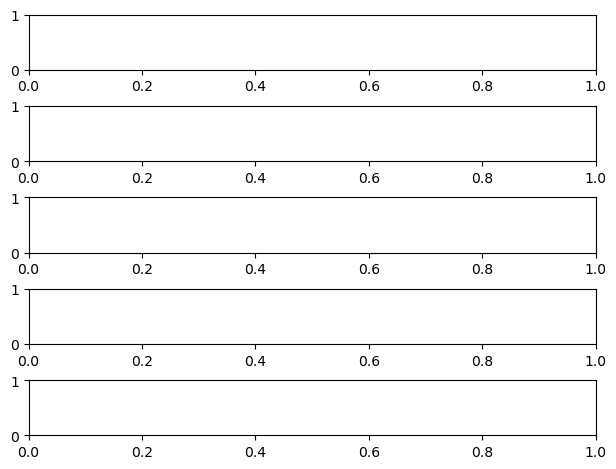

In [35]:
fig, axs = plt.subplots(5)
fig.tight_layout(h_pad=0.5)
bar_width = 0.9
x_axis = np.array(['New Trajectory', 'Old Trajectory', 'Thesis Result'])
thesis_results =[94.650526, 33.898852, 28.782526, 41.569209, 37.165478]
thesis_errors = [0.715161, 1.735613, 0.508698, 0.215955, 0.147017  ]

for i in range (0, 5):

    axs[i].bar(x_axis,[df_BTN_50.iloc[i]["Mean"], df_BTN_50_old.iloc[i]["Mean"], thesis_results[i]], bar_width, color= colors[i])
    axs[i].errorbar(x_axis, [df_BTN_50.iloc[i]["Mean"], df_BTN_50_old.iloc[i]["Mean"], thesis_results[i]] ,yerr = [df_BTN_50.iloc[i]["SE"], df_BTN_50_old.iloc[i]["SE"], thesis_errors[i]], fmt="none", color="black", capsize = 3)
    axs[i].set_title(labels[i])

#axs[0,0].legend(loc="upper right", fontsize = 10)
#axs[0,1].legend(loc="upper right", fontsize = 10)
for ax in axs.flat:
   ax.label_outer()
plt.show()
fig.savefig("50_bar_charts.png")
plt.close(fig)

In [ ]:
#we can try looking at the energies?


# STREPTAVIDIN

## Streptavidin - free

### general functions

In [26]:
### TO BE FAIR, we should actually do the UA level errors from the sum of errors per residue!!!!!!!!

def errors_STV (chain,new_column_name,new_df,df_rep1, df_rep2, df_rep3, df_rep4, df_rep5):
    SEs=[]                                                                                                                                                                                                                                                                                         
    for i in range (0,(len(new_df)-1)):
        values_array = [df_rep1.iloc[i][chain],df_rep2.iloc[i][chain], df_rep3.iloc[i][chain],df_rep4.iloc[i][chain],df_rep5.iloc[i][chain]]
        SDs.append(stdev(values_array))
        SEs.append(stdev(values_array)/math.sqrt(5))
    sum_SD = 0
    sum_SE = 0
    for i in range (0,(len(new_df)-1)):
        sum_SD+=SDs[i]**2
        sum_SE+=SEs[i]**2
    SEs.append(math.sqrt(sum_SE))
    new_df[new_column_name]=SEs

In [27]:
def create_avg_dataframe(df_rep1, df_rep2, df_rep3, df_rep4, df_rep5):
    new_df= pd.DataFrame()
    new_df["Term"] = df_rep1["Term"]
    new_df["A"] =(df_rep1["A"]+df_rep2["A"]+df_rep3["A"]+df_rep4["A"]+df_rep5["A"])/5
    errors_STV("A", "A_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["B"] =(df_rep1["B"]+df_rep2["B"]+df_rep3["B"]+df_rep4["B"]+df_rep5["B"])/5
    errors_STV("B", "B_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["C"] =(df_rep1["C"]+df_rep2["C"]+df_rep3["C"]+df_rep4["C"]+df_rep5["C"])/5
    errors_STV("C", "C_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["D"] =(df_rep1["D"]+df_rep2["D"]+df_rep3["D"]+df_rep4["D"]+df_rep5["D"])/5
    errors_STV("D", "D_err", new_df, df_rep1, df_rep2, df_rep3, df_rep4, df_rep5)
    new_df["Average per Chain"] = (new_df["A"]+new_df["B"]+new_df["C"]+new_df["D"])/4
    return new_df


## New Trajectory + Checking Convergence

- 4 x 127 residues per monomer

In [7]:
df_STV_unbound_polymer_transvib_long=pd.read_table('STV_unbound/polymer_vib/STV_polymer_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_polymer_transvib_long)
df_STV_unbound_polymer_rovib_long=pd.read_table('STV_unbound/polymer_vib/STV_polymer_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_polymer_rovib_long)
df_STV_unbound_res_transvib_long=pd.read_table('STV_unbound/res_vib/STV_residue_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_res_transvib_long)
df_STV_unbound_res_rovib_long=pd.read_table('STV_unbound/res_vib/STV_residue_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_res_rovib_long)
df_STV_unbound_uatom_transvib_long=pd.read_table('STV_unbound/uatom_vib/STV_uatom_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_uatom_transvib_long)
df_STV_unbound_uatom_rovib_long=pd.read_table('STV_unbound/uatom_vib/STV_uatom_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_uatom_rovib_long)
df_STV_unbound_BB_long=pd.read_table('STV_unbound/uatom_conf/STV_BB.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_BB_long) #we keep this bc there are correlations accounted for 
#df_STV_unbound_topog_3_new=pd.read_table('STV_unbound/STV_topog_3.out', sep = "\t", names = ["A","B","C","D"])
#average_per_chain(df_STV_unbound_topog_3_new)

In [85]:
# Backbone conformational entropy - correlated plogp
# Sidechain conformational entropy - adaptive enumeration

In [9]:
rows = len(df_STV_unbound_polymer_transvib_long)

In [10]:
STV_unbound_polymer_transvib_long_errors = []
STV_unbound_polymer_rovib_long_errors = []
STV_unbound_res_transvib_long_errors = []
STV_unbound_res_rovib_long_errors = []
STV_unbound_uatom_conf_BB_long_errors = []
'''
TO CHANGE WHEN WE HAVE SAME TIMES FOR ALL
'''
for i in range (0,rows,5):
    STV_unbound_polymer_transvib_long_errors.append(avg_error(df_STV_unbound_polymer_transvib_long[i:i+5]))
    STV_unbound_polymer_rovib_long_errors.append(avg_error(df_STV_unbound_polymer_rovib_long[i:i+5]))
    STV_unbound_res_transvib_long_errors.append(avg_error(df_STV_unbound_res_transvib_long[i:i+5]))
    STV_unbound_res_rovib_long_errors.append(avg_error(df_STV_unbound_res_rovib_long[i:i+5]))
for i in range (0,len(df_STV_unbound_BB_long),5):
    STV_unbound_uatom_conf_BB_long_errors.append(avg_error(df_STV_unbound_BB_long[i:i+5]))


In [ ]:
'''
PER RESIDUE
'''

In [ ]:
'''
UNITED ATOM ERRORS

'''
#STV_unbound_uatom_transvib_error = avg_error_uatom(df_STV_unbound_uatom_transvib)
#STV_unbound_uatom_rovib_error = avg_error_uatom(df_STV_unbound_uatom_rovib)
#STV_unbound_topog_3_SC_error = avg_error(df_STV_unbound_topog_3_SC)

In [11]:
STV_unbound_polymer_transvib_long_values = []
STV_unbound_polymer_rovib_long_values = []
STV_unbound_res_transvib_long_values = []
STV_unbound_res_rovib_long_values = []
STV_unbound_uatom_conf_BB_long_values = []
#don't forget to add uatom terms!!!
for i in range (0,rows,5):
    STV_unbound_polymer_transvib_long_values.append(mean(df_STV_unbound_polymer_transvib_long.iloc[i:i+5]["Average Per Chain"]))
    STV_unbound_polymer_rovib_long_values.append(mean(df_STV_unbound_polymer_rovib_long.iloc[i:i+5]["Average Per Chain"]))
    STV_unbound_res_transvib_long_values.append(mean(df_STV_unbound_res_transvib_long.iloc[i:i+5]["Average Per Chain"]))
    STV_unbound_res_rovib_long_values.append(mean(df_STV_unbound_res_rovib_long.iloc[i:i+5]["Average Per Chain"]))
    
for i in range (0,len(df_STV_unbound_BB_long),5):
    STV_unbound_uatom_conf_BB_long_values.append(mean(df_STV_unbound_BB_long.iloc[i:i+5]["Average Per Chain"]))


In [12]:
times = [50, 100, 200, 300, 400,500,600]

In [75]:
#50 ns - 1000 frames

ValueError: x and y must have same first dimension, but have shapes (7,) and (5,)

<Figure size 640x480 with 0 Axes>

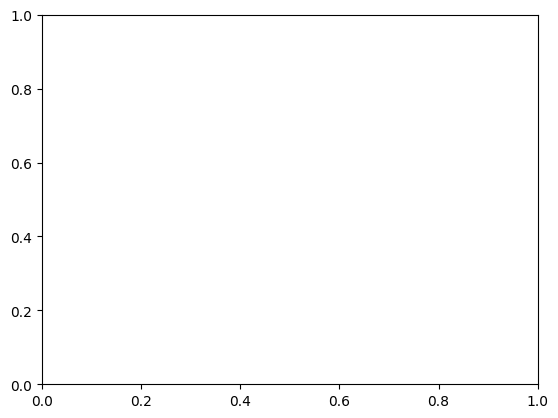

In [13]:
fig = plt.figure()
fig, ax = plt.subplots()
#ax.plot(times, STV_ua_transvib_values, marker = '*', label = labels[0], color = colors [0])
#ax.errorbar(times, ua_transvib_values[1:], ua_transvib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

#ax.plot(times, STV_ua_rovib_values, marker = '*', label = labels[1], color = colors [1])
#ax.errorbar(times, ua_rovib_values[1:], ua_rovib_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

#ax.plot(times, STV_ua_conf_values, marker = '*', label = labels[2], color = colors [2])
#ax.errorbar(times, ua_conf_values[1:], ua_conf_errors[1:], fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_res_transvib_long_values, marker = '*', label = "Residue Transvibrational", color = colors [4])
ax.errorbar(times, STV_unbound_res_transvib_long_values, STV_unbound_res_transvib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_res_rovib_long_values, marker = 'o', label = "Residue Rovibrational", color = colors [5])
ax.errorbar(times, STV_unbound_res_rovib_long_values ,STV_unbound_res_rovib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_polymer_transvib_long_values, marker = '^', label = "Polymer Transvibrational", color = colors [6])
ax.errorbar(times, STV_unbound_polymer_transvib_long_values ,STV_unbound_polymer_transvib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_polymer_rovib_long_values, marker = 'D', label = "Polymer Rovibrational", color = colors [7])
ax.errorbar(times, STV_unbound_polymer_rovib_long_values ,STV_unbound_polymer_rovib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)



ax.set_xlabel("$Time \ (ns)$")
ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title("New trajectories with Donald's code with force halving")
#fig.savefig("STV_convergence_400ns.png")
plt.show()
plt.close()


<Figure size 640x480 with 0 Axes>

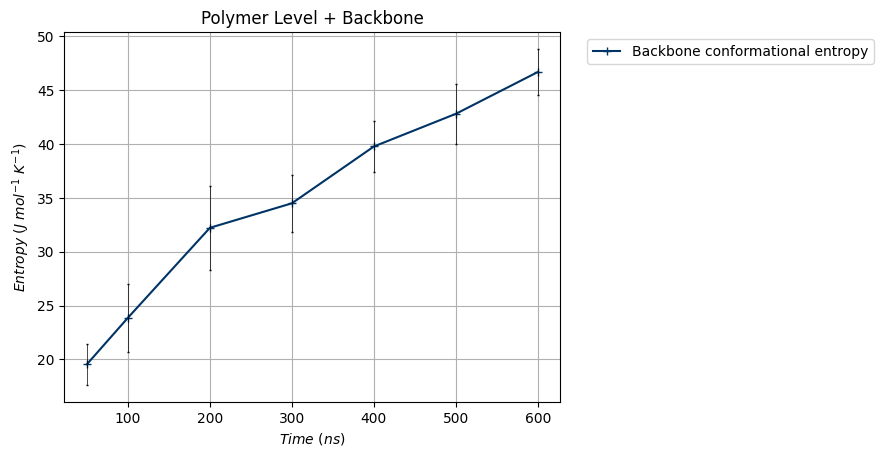

In [14]:
fig = plt.figure()
fig, ax = plt.subplots()
#ax.plot(times, STV_unbound_polymer_transvib_long_values, marker = '^', label = "Polymer Transvibrational", color = colors [6])
#ax.errorbar(times, STV_unbound_polymer_transvib_long_values ,STV_unbound_polymer_transvib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

#ax.plot(times, STV_unbound_polymer_rovib_long_values, marker = 'D', label = "Polymer Rovibrational", color = colors [7])
#ax.errorbar(times, STV_unbound_polymer_rovib_long_values ,STV_unbound_polymer_rovib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_uatom_conf_BB_long_values, marker = '+', label = "Backbone conformational entropy", color = colors [0])
ax.errorbar(times, STV_unbound_uatom_conf_BB_long_values,STV_unbound_uatom_conf_BB_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)


ax.set_xlabel("$Time \ (ns)$")
ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title("Polymer Level + Backbone")
#fig.savefig("STV_convergence_400ns.png")
plt.grid()
plt.show()
plt.close()



<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
C:\Users\PHP24IAP\AppData\Local\Temp\ipykernel_16252\3230545827.py:10: SyntaxWarning: invalid escape sequence '\ '
  ax.set_xlabel("$Time \ (ns)$")
C:\Users\PHP24IAP\AppData\Local\Temp\ipykernel_16252\3230545827.py:11: SyntaxWarning: invalid escape sequence '\ '
  ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")


<Figure size 640x480 with 0 Axes>

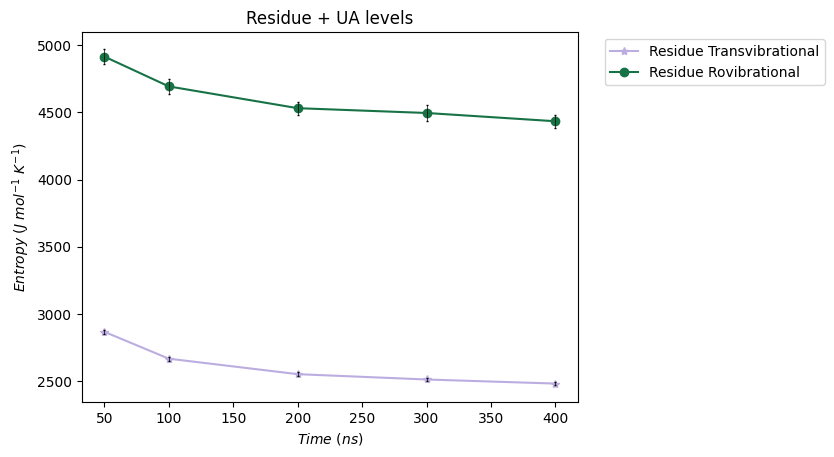

In [72]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.plot(times, STV_unbound_res_transvib_long_values, marker = '*', label = "Residue Transvibrational", color = colors [4])
ax.errorbar(times, STV_unbound_res_transvib_long_values, STV_unbound_res_transvib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.plot(times, STV_unbound_res_rovib_long_values, marker = 'o', label = "Residue Rovibrational", color = colors [5])
ax.errorbar(times, STV_unbound_res_rovib_long_values ,STV_unbound_res_rovib_long_errors, fmt= 'none' ,ecolor ="black", elinewidth = 0.5,capsize = 1)

ax.set_xlabel("$Time \ (ns)$")
ax.set_ylabel("$Entropy\  (J\  mol^{-1}\ K^{-1}$)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title("Residue + UA levels")
#fig.savefig("STV_convergence_400ns.png")
plt.show()
plt.close()


## Old Trajectory


In [10]:
df_STV_unbound_polymer_transvib=pd.read_table('old_traj/STV_unbound/STV_polymer_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_polymer_transvib)
df_STV_unbound_polymer_rovib=pd.read_table('old_traj/STV_unbound/STV_polymer_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_polymer_rovib)
df_STV_unbound_res_transvib=pd.read_table('old_traj/STV_unbound/STV_res_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_res_transvib)
df_STV_unbound_res_rovib=pd.read_table('old_traj/STV_unbound/STV_res_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_res_rovib)
df_STV_unbound_uatom_transvib=pd.read_table('old_traj/STV_unbound/STV_uatom_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_uatom_transvib)
df_STV_unbound_uatom_rovib=pd.read_table('old_traj/STV_unbound/STV_uatom_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_uatom_rovib)
df_STV_unbound_topog_1_SC=pd.read_table('old_traj/STV_unbound/STV_topog_1_SC.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_topog_1_SC)
df_STV_unbound_topog_1_BB=pd.read_table('old_traj/STV_unbound/STV_topog_1_BB.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_topog_1_BB)
df_STV_unbound_topog_2_SC=pd.read_table('old_traj/STV_unbound/STV_topog_2_SC_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_topog_2_SC)
df_STV_unbound_topog_2_BB=pd.read_table('old_traj/STV_unbound/STV_topog_2_BB_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_topog_2_BB)
df_STV_unbound_topog_3=pd.read_table('old_traj/STV_unbound/STV_topog_3.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_topog_3)


In [15]:
STV_unbound_polymer_transvib_long_error = avg_error(df_STV_unbound_polymer_transvib)
STV_unbound_polymer_rovib_error = avg_error(df_STV_unbound_polymer_rovib)
STV_unbound_res_transvib_error = avg_error(df_STV_unbound_res_transvib)
STV_unbound_res_rovib_error = avg_error(df_STV_unbound_res_rovib)
STV_unbound_uatom_transvib_error = avg_error(df_STV_unbound_uatom_transvib)
STV_unbound_uatom_rovib_error = avg_error(df_STV_unbound_uatom_rovib)
STV_unbound_topog_1_SC_error = avg_error(df_STV_unbound_topog_1_SC)
STV_unbound_topog_1_BB_error = avg_error(df_STV_unbound_topog_1_BB)
STV_unbound_topog_2_SC_error = avg_error(df_STV_unbound_topog_2_SC)
STV_unbound_topog_2_BB_error = avg_error(df_STV_unbound_topog_2_BB)
STV_unbound_topog_3_error = avg_error(df_STV_unbound_topog_3)

In [16]:
df_STV_unbound_polymer_transvib



,A,B,C,D,Average Per Chain,avg_err
0,67.4725,67.8727,67.8686,67.4651,67.669725,0.116017
1,67.6150,67.0545,67.6230,67.4711,67.440900,0.133444
2,67.2853,67.1119,67.3623,68.5876,67.586775,0.337692
3,67.2561,67.9386,67.6973,67.6114,67.625850,0.141375
4,67.4486,67.9047,67.6530,67.5609,67.641800,0.406559


In [17]:
df_STV_unbound_topog_3

,A,B,C,D,Average Per Chain,avg_err
0,378.219,377.708,418.781,363.551,384.56475,11.901026
1,435.535,484.004,402.674,398.715,430.23200,19.732195
2,412.684,390.497,415.752,440.538,414.86775,10.240629
3,404.122,396.892,405.494,461.116,416.90600,14.856953
4,427.418,453.587,395.473,381.383,414.46525,29.267619


In [18]:
df_STV_bound_old_without_scaling = pd.read_table('old_traj/STV_bound/STV_res_transvib_values_without_scaling.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_old_without_scaling)
STV_bound_transvib_error_without_scaling = avg_error(df_STV_bound_old_without_scaling)


In [19]:
STV_comparison = pd.DataFrame()
STV_comparison["Term"] = ["Polymer_Transvibrational", "Polymer_Rovibrational", "Residue_Transvibrational", "Residue_Rovibrational", "UA_Transvibrational", "UA_Rovibrational", "Topographical_1_side_chain", "Topographical_1_backbone", "Topographical_2_side_chain", "Topographical_2_backbone", "Topographical_3"]
STV_unbound_no_fh_terms = [50.17,46.00, 2893.93, 2990.47, 2365.79, 896.75, 0,0,0,0,0]
STV_unbound_no_fh_terms_error = [0.13, 0.13, 50.81, 102.26, 0,0, 0,0,0,0,0]
STV_bound_no_fh_terms = [55.38, 50.64, mean(df_STV_bound_old_without_scaling["Average Per Chain"]), 2833.10, 2479.36, 908.48, 0,0,0,0,0]
STV_bound_no_fh_terms_error = [2.21,1.92, STV_bound_transvib_error_without_scaling, 8.88, 4.41, 0, 0,0,0,0,0]


STV_comparison["Unbound_no_scaling"] = STV_unbound_no_fh_terms
STV_comparison["Unbound_Error_no_scaling"] = STV_unbound_no_fh_terms_error




In [20]:
STV_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling
0,Polymer_Transvibrational,50.17,0.13
1,Polymer_Rovibrational,46.00,0.13
2,Residue_Transvibrational,2893.93,50.81
3,Residue_Rovibrational,2990.47,102.26
4,UA_Transvibrational,2365.79,0.00
5,UA_Rovibrational,896.75,0.00
6,Topographical_1_side_chain,0.00,0.00
7,Topographical_1_backbone,0.00,0.00
8,Topographical_2_side_chain,0.00,0.00
9,Topographical_2_backbone,0.00,0.00


In [21]:
STV_unbound_fh_terms = [mean(df_STV_unbound_polymer_transvib["Average Per Chain"]),
                        mean(df_STV_unbound_polymer_rovib["Average Per Chain"]),
                        mean(df_STV_unbound_res_transvib["Average Per Chain"]),
                        mean(df_STV_unbound_res_rovib["Average Per Chain"]),
                        mean(df_STV_unbound_uatom_transvib["Average Per Chain"]),
                        mean(df_STV_unbound_uatom_rovib["Average Per Chain"]),
                        mean(df_STV_unbound_topog_1_SC["Average Per Chain"]),
                        mean(df_STV_unbound_topog_1_BB["Average Per Chain"]),
                        mean(df_STV_unbound_topog_2_SC["Average Per Chain"]),
                        mean(df_STV_unbound_topog_2_BB["Average Per Chain"]),
                        mean(df_STV_unbound_topog_3["Average Per Chain"]),
                        ]
STV_comparison["Unbound_scaling"] = STV_unbound_fh_terms
STV_unbound_fh_terms_error = [ STV_unbound_polymer_transvib_error,
                              STV_unbound_polymer_rovib_error,
                              STV_unbound_res_transvib_error,
                              STV_unbound_res_rovib_error,
                              STV_unbound_uatom_transvib_error,
                              STV_unbound_uatom_rovib_error,
                              STV_unbound_topog_1_SC_error,
                              STV_unbound_topog_1_BB_error,
                              STV_unbound_topog_2_SC_error,
                              STV_unbound_topog_2_BB_error,
                              STV_unbound_topog_3_error,
]
STV_comparison["Unbound_Error_scaling"] = STV_unbound_fh_terms_error


In [ ]:
STV_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling
0,Polymer_Transvibrational,50.17,0.13,67.593010,0.167196
1,Polymer_Rovibrational,46.00,0.13,63.367455,0.134554
2,Residue_Transvibrational,2893.93,50.81,2892.311885,13.387961
3,Residue_Rovibrational,2990.47,102.26,4874.552090,51.588827
4,UA_Transvibrational,2365.79,0.00,2459.823350,5.417121
5,UA_Rovibrational,896.75,0.00,3956.927400,4.463902
6,Topographical_1_side_chain,0.00,0.00,1012.093050,32.102759
7,Topographical_1_backbone,0.00,0.00,38.159600,2.565143
8,Topographical_2_side_chain,0.00,0.00,491.735700,11.408266
9,Topographical_2_backbone,0.00,0.00,18.642100,1.089920


#### per residue

In [30]:
residues = ['ALA','GLY','ILE','LEU','PRO','VAL','PHE','TRP','TYR','ASP','GLU','ARG','HIS','LYS','SER','THR','ASN','GLN']

![Entropy per residue from Chakravorty et al.,2020](residues_Argos_paper.png)

In [ ]:
# from Chakravorty et al,2020 (MCC for proteins paper)
#transvib - blue
#rovib - red
#conformational - green

![Relevant residues](AAs.png)

In [14]:
df_STV_unbound_transvib_per_residue=pd.read_table('old_traj/STV_unbound/STV_transvib_per_residue.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_transvib_per_residue)
df_STV_unbound_rovib_per_residue=pd.read_table('old_traj/STV_unbound/STV_rovib_per_residue.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_rovib_per_residue)

In [15]:
df_STV_unbound_transvib_per_residue

,A,B,C,D,Average Per Chain,avg_err
0,8.915,9.457,8.935,9.150,9.11425,0.126025
1,22.081,25.149,22.440,22.310,22.99500,0.721824
2,5.990,7.036,5.746,5.364,6.03400,0.357979
3,2.827,3.054,2.665,2.738,2.82100,0.084434
4,27.617,27.052,26.496,26.527,26.92300,0.264169
...,...,...,...,...,...,...
630,11.864,11.769,12.291,12.929,12.21325,0.264209
631,10.469,10.389,10.175,11.332,10.59125,0.254595
632,5.410,5.419,5.384,6.601,5.70350,0.299259
633,5.276,4.986,5.093,6.092,5.36175,0.250671


In [16]:
df_STV_unbound_rovib_per_residue

,A,B,C,D,Average Per Chain,avg_err
0,38.080,38.362,38.612,38.531,38.39625,0.117577
1,22.023,22.529,21.564,21.395,21.87775,0.254413
2,25.631,24.970,24.792,23.898,24.82275,0.357195
3,12.837,14.031,11.942,12.159,12.74225,0.469968
4,53.312,54.703,53.209,52.736,53.49000,0.423333
...,...,...,...,...,...,...
630,26.127,26.682,27.055,26.556,26.60500,0.191336
631,20.277,20.616,20.715,20.692,20.57500,0.101560
632,24.881,24.426,23.801,26.945,25.01325,0.680904
633,24.434,24.324,23.923,23.407,24.02200,0.232554


In [17]:
#where no_of_residues is per monomer
def average_per_residue (df):
    average_values_per_residue = []
    no_of_residues = int((len(df)+1)/5)
    for i in range (0, no_of_residues):
        index_1 =i
        index_2 = i+no_of_residues
        index_3 = i + 2*no_of_residues
        index_4 = i + 3*no_of_residues
        index_5 = i + 4*no_of_residues
        average_values_per_residue.append(mean([df.iloc[index_1]["Average Per Chain"], df.iloc[index_2]["Average Per Chain"], df.iloc[index_3]["Average Per Chain"], df.iloc[index_4]["Average Per Chain"],df.iloc[(index_5)]["Average Per Chain"]]))
    return average_values_per_residue

In [18]:
all_residues = pd.read_table("old_traj/STV_unbound/res_names.out", names = ["RESNAMES"])
res_names_unbound = all_residues.iloc[0:127]["RESNAMES"]

In [19]:
def get_res_codes(res_names):
    res_codes = []
    for residue in  res_names:
        if residue == "NALA":
            res_codes.append("A")
        elif residue == "CSER":
            res_codes.append("S")
        elif residue in histidine_names:
            res_codes.append("H")
        else:
            res_codes.append(residue_1_letter_codes[residue])
    return res_codes

In [20]:
res_codes_unbound = get_res_codes(res_names_unbound)

In [21]:
df_STV_unbound_per_residue = pd.DataFrame()
df_STV_unbound_per_residue["RESNAME"] = res_names_unbound
df_STV_unbound_per_residue["RESCODE"] = res_codes_unbound

In [22]:
df_STV_unbound_per_residue

,RESNAME,RESCODE
0,NALA,A
1,GLU,E
2,ALA,A
3,GLY,G
4,ILE,I
...,...,...
122,PRO,P
123,SER,S
124,ALA,A
125,ALA,A


In [12]:
df_STV_unbound_per_residue["Transvibrational"] = average_per_residue (df_STV_unbound_transvib_per_residue)
#df_STV_unbound_per_residue["transvib_error"] = avg_error(df_STV_unbound_transvib_per_residue)
df_STV_unbound_per_residue["Rovibrational"] = average_per_residue (df_STV_unbound_rovib_per_residue)
#df_STV_unbound_per_residue["rovib_error"] = avg_error(df_STV_unbound_rovib_per_residue)

NameError: name 'average_per_residue' is not defined

In [2]:
df_STV_unbound_per_residue

NameError: name 'df_STV_unbound_per_residue' is not defined

In [25]:
df_STV_unbound_conf_per_residue=pd.read_table('old_traj/STV_unbound/STV_AEM_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_unbound_conf_per_residue)

In [26]:
df_STV_unbound_per_residue["Conformational - AEM side chain"] = df_STV_unbound_conf_per_residue["Average Per Chain"]
df_STV_unbound_per_residue["conf_error"] = avg_error(df_STV_unbound_conf_per_residue)

In [27]:
df_STV_unbound_per_residue

,RESNAME,RESCODE,Transvibrational,transvib_error,Rovibrational,rovib_error,Conformational - AEM side chain,conf_error
0,NALA,A,9.25475,0.030221,38.42435,0.030163,0.439350,0.079813
1,GLU,E,23.13755,0.030221,21.60980,0.030163,18.959925,0.079813
2,ALA,A,6.19280,0.030221,24.95090,0.030163,-0.000000,0.079813
3,GLY,G,2.70590,0.030221,12.57150,0.030163,-0.000000,0.079813
4,ILE,I,25.37175,0.030221,52.50020,0.030163,1.847975,0.079813
...,...,...,...,...,...,...,...,...
122,PRO,P,12.52230,0.030221,26.61455,0.030163,6.136975,0.079813
123,SER,S,10.63745,0.030221,20.89365,0.030163,7.049575,0.079813
124,ALA,A,5.84835,0.030221,25.10065,0.030163,-0.000000,0.079813
125,ALA,A,5.50950,0.030221,24.32790,0.030163,-0.000000,0.079813


In [56]:
resname = df_STV_unbound_per_residue.iloc[3]["RESNAME"]
print(resname[-3:])

GLY


In [27]:
unbound_residue_count = {
    "ALA": 0,
    "GLY": 0,
    "ILE": 0,
    "LEU": 0,
    "PRO": 0,
    "VAL": 0,
    "PHE": 0,
    "TRP": 0,
    "TYR": 0,
    "ASP": 0,
    "GLU": 0,
    "ARG": 0,
    "HIS": 0,
    "LYS": 0,
    "SER": 0,
    "THR": 0,
    "CYS": 0,
    "MET": 0,
    "ASN": 0,
    "GLN": 0,
}

In [26]:
unbound_residue_transvib = {
    "ALA": 0,
    "GLY": 0,
    "ILE": 0,
    "LEU": 0,
    "PRO": 0,
    "VAL": 0,
    "PHE": 0,
    "TRP": 0,
    "TYR": 0,
    "ASP": 0,
    "GLU": 0,
    "ARG": 0,
    "HIS": 0,
    "LYS": 0,
    "SER": 0,
    "THR": 0,
    "CYS": 0,
    "MET": 0,
    "ASN": 0,
    "GLN": 0,
}

In [25]:
unbound_residue_rovib = {
    "ALA": 0,
    "GLY": 0,
    "ILE": 0,
    "LEU": 0,
    "PRO": 0,
    "VAL": 0,
    "PHE": 0,
    "TRP": 0,
    "TYR": 0,
    "ASP": 0,
    "GLU": 0,
    "ARG": 0,
    "HIS": 0,
    "LYS": 0,
    "SER": 0,
    "THR": 0,
    "CYS": 0,
    "MET": 0,
    "ASN": 0,
    "GLN": 0,
}

In [21]:
unbound_residue_conf = {
    "A": 0,
    "G": 0,
    "I": 0,
    "L": 0,
    "P": 0,
    "V": 0,
    "F": 0,
    "W": 0,
    "Y": 0,
    "D": 0,
    "E": 0,
    "R": 0,
    "H": 0,
    "K": 0,
    "S": 0,
    "T": 0,
    "C": 0,
    "M": 0,
    "N": 0,
    "Q": 0,
}

In [22]:
for residue in residues:
    unbound_residue_count[residue]=0
    unbound_residue_transvib[residue]=0
    unbound_residue_rovib[residue]=0
    unbound_residue_conf[residue]=0

In [65]:
all_residues_unbound = []
for i in range (0,len(df_STV_unbound_per_residue)):
    resname = df_STV_unbound_per_residue.loc[i]['RESNAME']
    if resname in histidine_names:
        resname = "HIS"
    else:
        resname = resname[-3:]
    all_residues_unbound.append(resname)
    unbound_residue_count[resname]+=1
    unbound_residue_transvib [resname]+= df_STV_unbound_per_residue.loc[i]['Transvibrational']
    unbound_residue_rovib [resname]+= df_STV_unbound_per_residue.loc[i]['Rovibrational']
    unbound_residue_conf [resname]+= df_STV_unbound_per_residue.loc[i]['Conformational - AEM side chain']

In [63]:
for residue in residues:
    unbound_residue_transvib[residue] = unbound_residue_transvib[residue]/unbound_residue_count[residue]
    unbound_residue_rovib[residue] = unbound_residue_rovib[residue]/unbound_residue_count[residue]
    unbound_residue_conf[residue] = unbound_residue_conf[residue]/unbound_residue_count[residue]

In [ ]:
''''' can do this later
def SE_per_residue_type(df,all_residues_array,entropy_term):
    all_entropies = {'GLY': [],
                         'ALA':[],
                         'ILE':[],
                         'LEU':[],
                         'VAL':[],
                         'PRO':[],
                         'PHE':[],
                         'TYR':[],
                         'TRP':[],
                         'SER':[],
                         'THR':[],
                         'ASN':[],
                         'ASP':[],
                         'GLN':[],
                         'GLU':[],
                         'HIS':[],
                         'LYS':[],
                         'ARG':[]
    
    }
    SEs = [] #same order as residues by name
    for i in range (0, 127):
        current_res=all_residues_array[i]
        S=df.iloc[i][entropy_term]
        unbound_all_entropies[current_res].append(S)
    for residue in unbound_all_entropies.keys():
        std = stdev (unbound_all_entropies[residue])
        count = unbound_residue_count[residue]
        se = std/np.sqrt(count)
        SEs.append(se)
    return SEs
'''''

In [32]:
unbound_all_entropies = {'Transvibrational': [],
                        'Rovibrational' : 
                        'Conformational':
    
    }
residues_1_letter = []
for residue in residues:
    residues_1_letter.append(residue_1_letter_codes[residue])
    unbound_all_entropies[residue].append(unbound_residue_transvib)
    unbound_all_entropies[residue].append(unbound_residue_rovib)
    unbound_all_entropies[residue].append(unbound_residue_conf)

In [13]:
def plot_bar_chart (x_axis, y_axis_dict,filename,c_vector):
    fig, ax = plt.subplots()
    bottom = np.zeros(len(x_axis))
    bar_width = 0.9
    i=0
    for entropy_component_name, entropy_component_values in y_axis_dict.items():
        p = ax.bar(x_axis, entropy_component_values, bar_width, label= entropy_component_name, bottom=bottom, align ='center', color = c_vector[i])
        bottom += entropy_component_values
        i+=1
    ax.set_ylabel ("Entropy ($ \mathrm{J \quad mol^{-1} \quad K^{-1}}$)")
    ax.legend(loc="upper left", fontsize = 10)
    margin = (1 - bar_width) + bar_width / 2
    #ax.set_xlim(-0.9, 2.9)
    ax.set_ylim(0,70)
    plt.show()
    fig.savefig(filename)
    plt.close(fig)

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\PHP24IAP\AppData\Local\Temp\ipykernel_20128\3741725868.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel ("Entropy ($ \mathrm{J \quad mol^{-1} \quad K^{-1}}$)")


TypeError: unhashable type: 'dict'

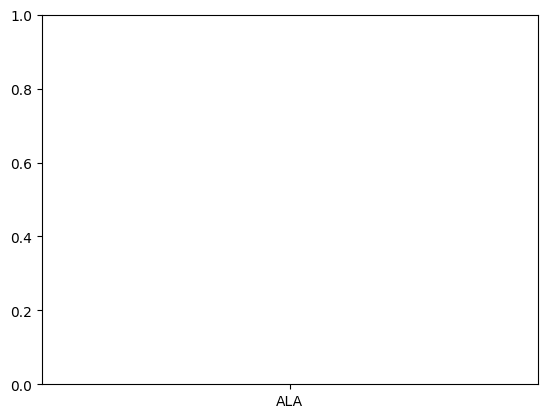

In [36]:
plot_bar_chart(residues, unbound_all_entropies, "unbound_avg_per_residue.png", colors )

## STV in Complex

#### all levels

In [54]:
df_STV_bound_polymer_transvib=pd.read_table('old_traj/STV_bound/STV_polymer_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_polymer_transvib)
df_STV_bound_polymer_rovib=pd.read_table('old_traj/STV_bound/STV_polymer_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_polymer_rovib)
df_STV_bound_res_transvib=pd.read_table('old_traj/STV_bound/STV_res_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_res_transvib)
df_STV_bound_res_rovib=pd.read_table('old_traj/STV_bound/STV_res_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_res_rovib)
df_STV_bound_uatom_transvib=pd.read_table('old_traj/STV_bound/STV_uatom_transvib.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_uatom_transvib)
df_STV_bound_uatom_rovib=pd.read_table('old_traj/STV_bound/STV_uatom_rovib.out',sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_uatom_rovib)
df_STV_bound_topog_1_SC=pd.read_table('old_traj/STV_bound/STV_topog_1_SC.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_topog_1_SC)
df_STV_bound_topog_1_BB=pd.read_table('old_traj/STV_bound/STV_topog_1_BB.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_topog_1_BB)
df_STV_bound_topog_2_SC=pd.read_table('old_traj/STV_bound/STV_topog_2_SC.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_topog_2_SC)
df_STV_bound_topog_2_BB=pd.read_table('old_traj/STV_bound/STV_topog_2_BB.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_topog_2_BB)
df_STV_bound_topog_3=pd.read_table('old_traj/STV_bound/STV_topog_3.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_topog_3)

In [55]:
STV_bound_polymer_transvib_error = avg_error(df_STV_bound_polymer_transvib)
STV_bound_polymer_rovib_error = avg_error(df_STV_bound_polymer_rovib)
STV_bound_res_transvib_error = avg_error(df_STV_bound_res_transvib)
STV_bound_res_rovib_error = avg_error(df_STV_bound_res_rovib)
STV_bound_uatom_transvib_error = avg_error(df_STV_bound_uatom_transvib)
STV_bound_uatom_rovib_error = avg_error(df_STV_bound_uatom_rovib)
STV_bound_topog_1_SC_error = avg_error(df_STV_bound_topog_1_SC)
STV_bound_topog_1_BB_error = avg_error(df_STV_bound_topog_1_BB)
STV_bound_topog_2_SC_error = avg_error(df_STV_bound_topog_2_SC)
STV_bound_topog_2_BB_error = avg_error(df_STV_bound_topog_2_BB)
STV_bound_topog_3_error = avg_error(df_STV_bound_topog_3)

In [56]:
STV_comparison["Bound_no_scaling"] = STV_bound_no_fh_terms
STV_comparison["Bound_Error_no_scaling"] = STV_bound_no_fh_terms_error

NameError: name 'STV_bound_no_fh_terms' is not defined

In [ ]:
STV_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling,Bound_no_scaling,Bound_Error_no_scaling
0,Polymer_Transvibrational,50.17,0.13,67.593010,0.167196,55.38000,2.210000
1,Polymer_Rovibrational,46.00,0.13,63.367455,0.134554,50.64000,1.920000
2,Residue_Transvibrational,2893.93,50.81,2892.311885,13.387961,2903.55034,17.051751
3,Residue_Rovibrational,2990.47,102.26,4874.552090,51.588827,2833.10000,8.880000
4,UA_Transvibrational,2365.79,0.00,2459.823350,5.417121,2479.36000,4.410000
5,UA_Rovibrational,896.75,0.00,3956.927400,4.463902,908.48000,0.000000
6,Topographical_1_side_chain,0.00,0.00,1012.093050,32.102759,0.00000,0.000000
7,Topographical_1_backbone,0.00,0.00,38.159600,2.565143,0.00000,0.000000
8,Topographical_2_side_chain,0.00,0.00,491.735700,11.408266,0.00000,0.000000
9,Topographical_2_backbone,0.00,0.00,18.642100,1.089920,0.00000,0.000000


In [ ]:
STV_bound_fh_terms = [mean(df_STV_bound_polymer_transvib["Average Per Chain"]),
                        mean(df_STV_bound_polymer_rovib["Average Per Chain"]),
                        mean(df_STV_bound_res_transvib["Average Per Chain"]),
                        mean(df_STV_bound_res_rovib["Average Per Chain"]),
                        mean(df_STV_bound_uatom_transvib["Average Per Chain"]),
                        mean(df_STV_bound_uatom_rovib["Average Per Chain"]),
                        mean(df_STV_bound_topog_1_SC["Average Per Chain"]),
                        mean(df_STV_bound_topog_1_BB["Average Per Chain"]),
                        mean(df_STV_bound_topog_2_SC["Average Per Chain"]),
                        mean(df_STV_bound_topog_2_BB["Average Per Chain"]),
                        mean(df_STV_bound_topog_3["Average Per Chain"]),
                        ]
STV_comparison["Bound_scaling"] = STV_bound_fh_terms
STV_bound_fh_terms_error = [ STV_bound_polymer_transvib_error,
                              STV_bound_polymer_rovib_error,
                              STV_bound_res_transvib_error,
                              STV_bound_res_rovib_error,
                              STV_bound_uatom_transvib_error,
                              STV_bound_uatom_rovib_error,
                              STV_bound_topog_1_SC_error,
                              STV_bound_topog_1_BB_error,
                              STV_bound_topog_2_SC_error,
                              STV_bound_topog_2_BB_error,
                              STV_bound_topog_3_error,
]
STV_comparison["Bound_Error_scaling"] = STV_bound_fh_terms_error

In [ ]:
STV_diff_no_fh_terms = []
STV_diff_no_fh_terms_error  = []
for i in range (0, len(STV_unbound_no_fh_terms)):
    STV_diff_no_fh_terms.append(STV_bound_no_fh_terms[i]- STV_unbound_no_fh_terms[i])
    STV_diff_no_fh_terms_error .append(math.sqrt(STV_unbound_no_fh_terms_error[i]**2 + STV_bound_no_fh_terms_error[i]**2))

STV_comparison["Difference_no_scaling"] = STV_diff_no_fh_terms
STV_comparison["Difference_Error_no_scaling"] = STV_diff_no_fh_terms_error

In [ ]:
STV_diff_fh_terms = []
STV_diff_fh_terms_error  = []
for i in range (0, len(STV_unbound_fh_terms)):
    STV_diff_fh_terms.append(STV_bound_fh_terms[i]- STV_unbound_fh_terms[i])
    STV_diff_fh_terms_error .append(math.sqrt(STV_unbound_fh_terms_error[i]**2 + STV_bound_fh_terms_error[i]**2))

STV_comparison["Difference_scaling"] = STV_diff_fh_terms
STV_comparison[" Difference_Error_scaling"] = STV_diff_fh_terms_error

NameError: name 'STV_unbound_fh_terms' is not defined

In [ ]:
STV_comparison

,Term,Unbound_no_scaling,Unbound_Error_no_scaling,Unbound_scaling,Unbound_Error_scaling,Bound_no_scaling,Bound_Error_no_scaling,Bound_scaling,Bound_Error_scaling,Difference_no_scaling,Difference_Error_no_scaling,Difference_scaling,Difference_Error_scaling
0,Polymer_Transvibrational,50.17,0.13,67.593010,0.167196,55.38,2.21,67.574940,0.147338,5.21,2.213820,-0.018070,0.222852
1,Polymer_Rovibrational,46.00,0.13,63.367455,0.134554,50.64,1.92,63.263745,0.162627,4.64,1.924396,-0.103710,0.211074
2,Residue_Transvibrational,2893.93,50.81,2892.311885,13.387961,1983.69,8.88,2903.550340,17.051751,-910.24,51.580137,11.238455,21.679477
3,Residue_Rovibrational,2990.47,102.26,4874.552090,51.588827,2833.10,4.41,4844.664620,61.849710,-157.37,102.355047,-29.887470,80.540634
4,UA_Transvibrational,2365.79,0.00,2459.823350,5.417121,2479.36,0.00,2509.016050,20.486249,113.57,0.000000,49.192700,21.190365
5,UA_Rovibrational,896.75,0.00,3956.927400,4.463902,908.48,0.00,3970.114250,10.720982,11.73,0.000000,13.186850,11.613177
6,Topographical_1_side_chain,0.00,0.00,1012.093050,32.102759,0.00,0.00,883.546700,49.687172,0.00,0.000000,-128.546350,59.155746
7,Topographical_1_backbone,0.00,0.00,38.159600,2.565143,0.00,0.00,33.734350,1.148156,0.00,0.000000,-4.425250,2.810377
8,Topographical_2_side_chain,0.00,0.00,491.735700,11.408266,0.00,0.00,432.660550,19.231820,0.00,0.000000,-59.075150,22.360935
9,Topographical_2_backbone,0.00,0.00,18.642100,1.089920,0.00,0.00,16.203250,0.668467,0.00,0.000000,-2.438850,1.278583


In [ ]:
STV_comparison.to_csv("STV_comparison.csv")

#### per residue

In [33]:
df_STV_bound_transvib_per_residue=pd.read_table('old_traj/STV_bound/STV_transvib_per_residue.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_transvib_per_residue)
df_STV_bound_rovib_per_residue=pd.read_table('old_traj/STV_bound/STV_rovib_per_residue.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_rovib_per_residue)
df_STV_bound_conf_per_residue=pd.read_table('old_traj/STV_bound/STV_AEM_values.out', sep = "\t", names = ["A","B","C","D"])
average_per_chain(df_STV_bound_conf_per_residue)

In [37]:
df_STV_bound_transvib_per_residue.to_csv("old_traj/STV_bound/df_STV_bound_transvib_per_residue.csv")

In [34]:
all_residues = pd.read_table("old_traj/STV_bound/res_names.out", names = ["RESNAMES"])
res_names_bound = all_residues.iloc[0:127]["RESNAMES"]
res_codes_bound = get_res_codes(res_names_bound)


In [31]:
df_STV_bound_per_residue = pd.DataFrame()
df_STV_bound_per_residue["RESNAME"] = res_names_bound
df_STV_bound_per_residue["RESCODE"] = res_codes_bound
df_STV_bound_per_residue["Transvibrational"] = average_per_residue (df_STV_bound_transvib_per_residue)
df_STV_bound_per_residue["transvib_error"] = avg_error(df_STV_bound_transvib_per_residue)
df_STV_bound_per_residue["Rovibrational"] = average_per_residue (df_STV_bound_rovib_per_residue)
df_STV_bound_per_residue["rovib_error"] = avg_error(df_STV_bound_rovib_per_residue)
df_STV_bound_per_residue["Conformational - AEM side chain"] = df_STV_bound_conf_per_residue["Average Per Chain"]
df_STV_bound_per_residue["conf_error"] = avg_error(df_STV_bound_conf_per_residue)

NameError: name 'res_names_bound' is not defined

In [36]:
df_STV_bound_per_residue

,RESNAME,RESCODE,Transvibrational,Rovibrational,Conformational - AEM side chain,conf_error
0,NALA,A,10.40320,36.60480,0.625925,0.078742
1,GLU,E,20.79185,21.68420,20.648575,0.078742
2,ALA,A,5.58690,23.47530,-0.000000,0.078742
3,GLY,G,4.95195,16.20535,-0.000000,0.078742
4,ILE,I,24.93985,50.94955,2.663025,0.078742
...,...,...,...,...,...,...
122,PRO,P,12.11265,26.05765,6.003950,0.078742
123,SER,S,9.93695,20.96405,7.670475,0.078742
124,ALA,A,5.56005,24.67595,-0.000000,0.078742
125,ALA,A,6.14355,23.96110,-0.000000,0.078742


## COMPARISON

### Different versions of 50 ns

In [ ]:
def plot_50ns_histograms (column, error_column, fig_name):
    fig, axs = plt.subplots(4,2)
    fig.tight_layout(h_pad=0.8)
    bar_width = 0.5
    x_axis = np.array(['New Trajectory', 'Old Trajectory, Older Code', 'Old Trajectory, Most Recent Code'])

    for i in range (0, 4):
        axs[i][0].bar(x_axis,[df_STV_50_AVG.iloc[i][column], df_STV_50_thesis_version_AVG.iloc[i][column], df_STV_50_old_traj_AVG.iloc[i][column]], bar_width, color= colors[i])
        axs[i][0].errorbar(x_axis, [df_STV_50_AVG.iloc[i][column], df_STV_50_thesis_version_AVG.iloc[i][column], df_STV_50_old_traj_AVG.iloc[i][column]] ,yerr = [df_STV_50_AVG.iloc[i][error_column], df_STV_50_thesis_version_AVG.iloc[i][error_column], df_STV_50_old_traj_AVG.iloc[i][error_column]], fmt="none", color="black", capsize = 3)
        axs[i][0].set_title(labels[i])

    for i in range (0, 4):

        axs[i][1].bar(x_axis,np.array([df_STV1_50.iloc[i+4][column], df_STV1_50_thesis_version.iloc[i+4][column],df_STV_50_old_traj_AVG.iloc[i+4][column]]), bar_width, color= colors[i+4])
        axs[i][1].errorbar(x_axis, [df_STV_50_AVG.iloc[i+4][column], df_STV_50_thesis_version_AVG.iloc[i+4][column], df_STV_50_old_traj_AVG.iloc[i+4][column]] ,yerr = [df_STV_50_AVG.iloc[i+4][error_column], df_STV_50_thesis_version_AVG.iloc[i+4][error_column], df_STV_50_old_traj_AVG.iloc[i+4][error_column]], fmt="none", color="black", capsize = 3)
        axs[i][1].set_title(labels[i+4])

    #axs[0,0].legend(loc="upper right", fontsize = 10)
    #axs[0,1].legend(loc="upper right", fontsize = 10)
    for ax in axs.flat:
        ax.label_outer()
    plt.show()
    fig.savefig(fig_name)
    plt.close(fig)

In [ ]:
plot_50ns_histograms("Average Per Chain, "avg_err", "AvgPerChain_50ns_comparison")

SyntaxError: unterminated string literal (detected at line 1) (784850482.py, line 1)